# Задание 1



**Описание**

Найти данные для классификации. Предобработать их, если это необходимо

**Решение**


In [ ]:
import pandas as pd

df_initial = pd.read_csv('nba_logreg.csv')

df_initial.info()
display(df_initial.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
import numpy as np

df = df_initial.copy()

numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) #Все пропуски в числовых столбцах заменяются на среднее значение этого столбца

print(df.isnull().sum())

df.describe()
df.head()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# Задание 2

**Описание**

Изобразить гистограмму, которая показывает баланс классов. Сделать выводы

**Решение**

831 509


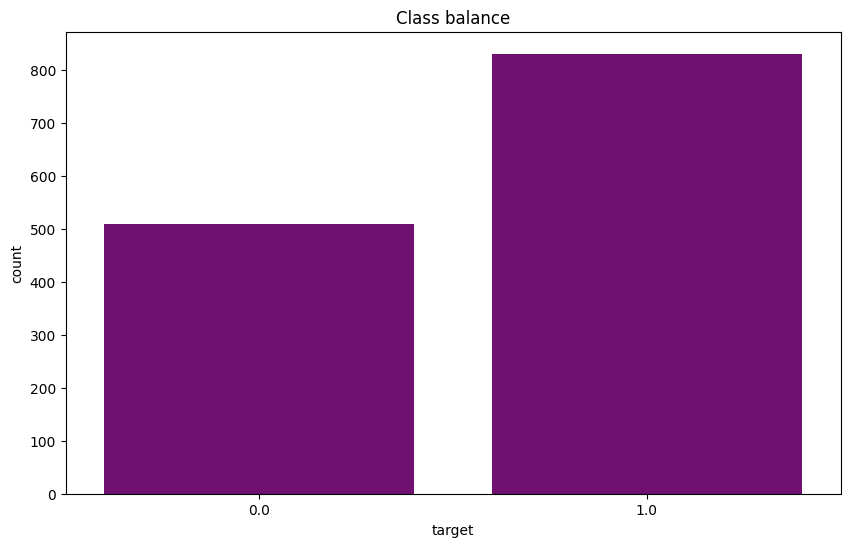

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'] = df['TARGET_5Yrs']

plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, color='purple')
plt.title('Class balance')

print((df['TARGET_5Yrs'] == 1.0).sum(), (df['TARGET_5Yrs'] != 1.0).sum()) #подсчет количества значений для каждого класса

plt.show()

**Вывод**

Исходя из полученных данных и графиков можно сказать, что `831` поступивших провели в лиге 5 лет или более, `509` - нет

# Задание 3

**Описание**

Разбить выборку на `тренировочную` и `тестовую`. `Тренировочная` - для обучения модели, `тестовая` - для проверки ее качества.


**Решение**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['GP', '3PA', 'REB', 'AST', 'BLK', 'FTA', 'STL']
X = df[features]
Y = df['TARGET_5Yrs']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.75, test_size=0.25)

print(f"Train sample size: {X_train.shape}")
print(f"Test sample size: {X_test.shape}")

Train sample size: (1005, 7)
Test sample size: (335, 7)


# Задание 4

**Описание**

Применить алгоритмы классификации: `логистическая регрессия`, `SVM`, `KNN`. Построить матрицу ошибок по результатам работы моделей (использовать `confusion_matrix` из `sklearn.metrics`)

**Решение**

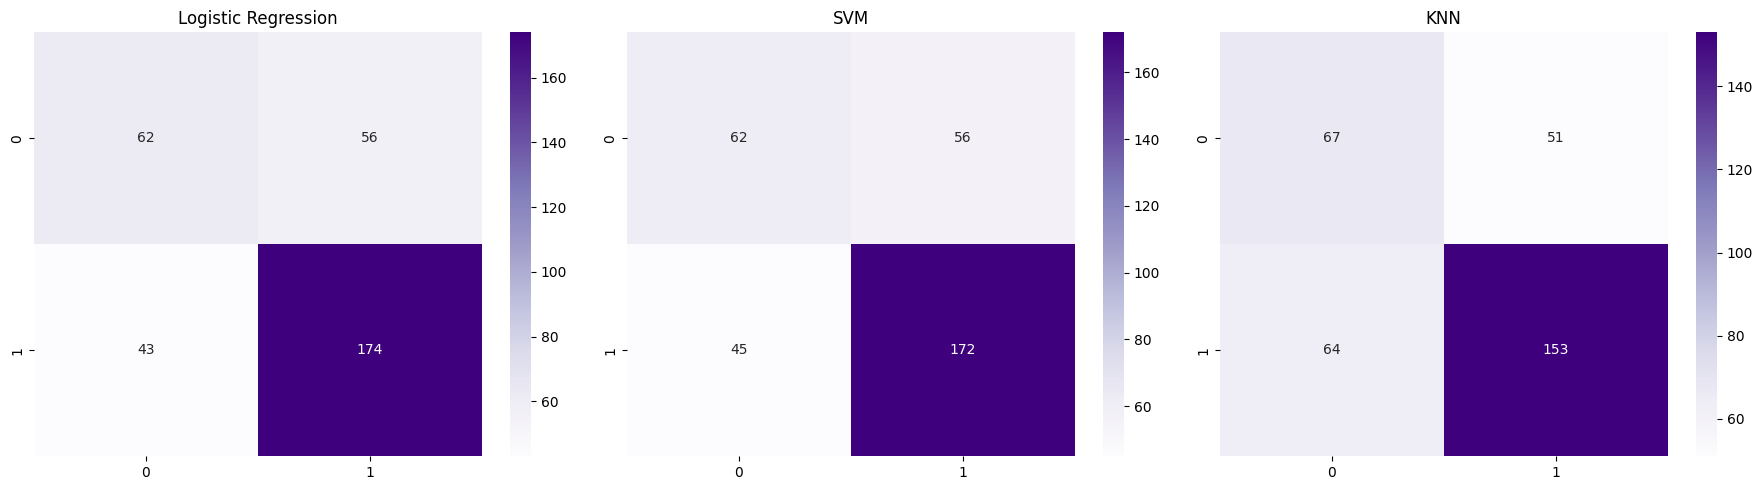

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=10)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for (name, result), ax in zip(results.items(), axes):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Purples',  ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

# Задание 5

**Описание**

Сравнить результаты классификации, используя `accuracy`, `precision`, `recall` и `fl`-меру (можно использовать `classification_report` из `sklearn.metrics`). Сделать выводы

**Решение**

In [ ]:
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(result['classification_report'])
    print(f"Accuracy: {result['accuracy']}")

print("\nAccuracy Comparison:")
for name, result in results.items():
    print(f"{name}: {result['accuracy']}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53       125
         1.0       0.72      0.85      0.78       210

    accuracy                           0.70       335
   macro avg       0.68      0.65      0.65       335
weighted avg       0.69      0.70      0.69       335

Accuracy: 0.7014925373134329

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54       125
         1.0       0.72      0.85      0.78       210

    accuracy                           0.70       335
   macro avg       0.69      0.65      0.66       335
weighted avg       0.70      0.70      0.69       335

Accuracy: 0.7044776119402985

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.44      0.49       125
         1.0       0.70      0.79      0.74       210

    accuracy            

**Вывод**

**Логистическая регрессия**

*Матрица ошибок*

\begin{bmatrix}
56 & 69\\
31 & 179
\end{bmatrix}

*Точность*

> Модель показывает хорошие результаты с достаточным балансом между истинными положительными и ложными положительными. Она правильно классифицировала значительное количество положительных случаев (`179`), но допустила некоторые ошибки в классификации отрицательных случаев (`69`).

*Вывод*

> Логистическая регрессия демонстрирует солидную точность и эффективно предсказывает положительные классы. Тем не менее, есть возможность улучшить модель, чтобы уменьшить количество ложных срабатываний.

---

**SVM (Метод опорных векторов)**

*Матрица ошибок*

\begin{bmatrix}
57 & 68\\
31 & 179
\end{bmatrix}

*Точность*

> Модель SVM немного превзошла логистическую регрессию по количеству правильно идентифицированных отрицательных случаев (`57`), сохраняя при этом достойное количество истинно положительных (`179`). Количество ложных отрицательных (`31`) подобно результату регрессии.

*Вывод*

> Модель SVM демонстрирует сильную (схожу с регрессией) классификационную производительность. Дальнейшая настройка гиперпараметров может помочь уменьшить количество ложных отрицательных.

---

**KNN (Метод ближайших соседей)**

*Матрица ошибок*

\begin{bmatrix}
55 & 70\\
44 & 166
\end{bmatrix}

*Точность*

> KNN слегка уступает по сравнению с двумя другими моделями. У него меньше истинно отрицательных (`55`) и больше ложных положительных (`70`).

*Вывод*
> KNN менее надежен в этом контексте (вероятно, из-за чувствительности к структуре данных). Модель может выиграть от оптимизации числа соседей или применения взвешивания расстояний

---

**Итоги**

*Сравнение точности*
- Логистическая регрессия: ~`0.7015`
- SVM: ~`0.7045`
- KNN: ~`0.6597`

*Выводы*

- Логистическая регрессия: Хорошая производительность с балансом ложных положительных и отрицательных
- SVM: Лучшие результаты по истинным отрицательным, с потенциалом для улучшения ложных отрицательных
- KNN: Худшие результаты в целом, что указывает на то, что эта модель может быть не лучшим выбором для данного набора данных
